<h1>Group 5</h1>

<h3>HW 5</h3>

<h3>Grayson Felt, Hayden Clegg, Beau Denhalter, Mitchell Green, Tommy Martineau</h3>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [3]:
rand_state= 2223

Import the wage_regularization.csv as a data frame and call it df

In [4]:
df = pd.read_csv('wage_regularization.csv')

In [5]:
df.head()

,wage,educ,educ2,educ3,educ4,educ5,age,age2,age3,age4,age5
0,769000.0,12,144,1728,20736,248832,31,961,29791,923521,28629151
1,808000.0,18,324,5832,104976,1889568,37,1369,50653,1874161,69343957
2,825000.0,14,196,2744,38416,537824,33,1089,35937,1185921,39135393
3,650000.0,12,144,1728,20736,248832,32,1024,32768,1048576,33554432
4,562000.0,11,121,1331,14641,161051,34,1156,39304,1336336,45435424


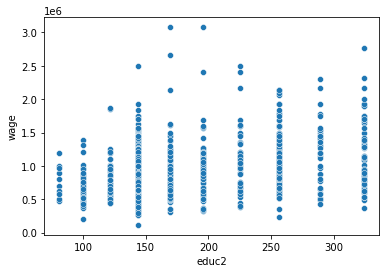

In [8]:
sns.scatterplot(x='educ', y='wage', data=df)
plt.show()

Seeing the distribution of variables is abnormal, we need to standardize so that the regularization techniques are not weighted by outliars and non-normal values. 

1. Standardize all the variables using StandarScaler() class from sklearn package. With the standardized variables, make a new data frame and call it df_sc.

In [5]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df_sc= scaler.fit_transform(df)
df_sc = pd.DataFrame(df_sc, columns=df.columns)
df_sc.head()

,wage,educ,educ2,educ3,educ4,educ5,age,age2,age3,age4,age5
0,-0.467520,-0.668851,-0.681389,-0.683465,-0.677116,-0.664268,-0.669710,-0.691203,-0.708954,-0.723031,-0.733576
1,-0.371019,2.064038,2.223684,2.379630,2.530868,2.675999,1.261947,1.281608,1.297931,1.310810,1.320211
2,-0.328955,0.242112,0.157854,0.074845,-0.003836,-0.075928,-0.025824,-0.072282,-0.117721,-0.161641,-0.203607
3,-0.761969,-0.668851,-0.681389,-0.683465,-0.677116,-0.664268,-0.347767,-0.386577,-0.422573,-0.455483,-0.485129
4,-0.979713,-1.124333,-1.052593,-0.979773,-0.909223,-0.842975,0.296119,0.251685,0.206178,0.160164,0.114187


2. Define your feature space and target variables and then split the data into test (20%) and train set (80%)

In [6]:
y = df_sc['wage']
X = df_sc.drop('wage', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)
X_train.head()

,educ,educ2,educ3,educ4,educ5,age,age2,age3,age4,age5
56,1.153075,1.126212,1.083935,1.028934,0.963879,-0.669710,-0.691203,-0.708954,-0.723031,-0.733576
448,-0.213370,-0.277907,-0.333418,-0.379129,-0.414957,-0.025824,-0.072282,-0.117721,-0.161641,-0.203607
16,0.697593,0.625894,0.545803,0.461101,0.375113,0.940004,0.928630,0.913427,0.894592,0.872387
225,-0.213370,-0.277907,-0.333418,-0.379129,-0.414957,-0.025824,-0.072282,-0.117721,-0.161641,-0.203607
853,-0.668851,-0.681389,-0.683465,-0.677116,-0.664268,0.296119,0.251685,0.206178,0.160164,0.114187


3. As a benchmark, use sm.OLS() function from statsmodel.api package to run the linear regression model on the train set.

In [7]:
X_test_wc = sm.add_constant(X_test)
X_train_wc = sm.add_constant(X_train)

    3.1 Report the summary output.

In [8]:
sm.OLS(y_train, X_train_wc).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     11.12
Date:                Sun, 28 Feb 2021   Prob (F-statistic):           8.14e-18
Time:                        15:17:22   Log-Likelihood:                -1010.6
No. Observations:                 748   AIC:                             2043.
Df Residuals:                     737   BIC:                             2094.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0047      0.034      0.135      0.892      -0.063       0.072
educ        -225.0852    193.087     -1.166      0.244    -604.151     153.980
educ2        952.7045    827.816      1.151      0.250    -672.454    2577.863
educ3      -1525.1271   1343.531     -1.135      0.257   -4162.731    1112.477
educ4       1095.6079    976.785      1.122      0.262    -822.004    3013.220
educ5       -297.8967    268.059     -1.111      0.267    -824.146     228.353
age         -414.2519   4336.681     -0.096      0.924   -8927.971    8099.468
age2        1693.1762   1.76e+04      0.096      0.924   -3.29e+04    3.63e+04
age3       -2637.5487    2.7e+04     -0.098      0.922   -5.56e+04    5.03e+04
age4        1854.6103   1.84e+04      0.101      0.920   -3.43e+04     3.8e+04
age5        -495.8722   4733.594     -0.105      0.917   -9788.808    8797.064
==============================================================================
Omnibus:                      180.458   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              518.248
Skew:                           1.188   Prob(JB):                    2.91e-113
Kurtosis:                       6.314   Cond. No.                     2.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

    3.2 From the summary report, What is the R-squared of the model in train set?

The R-squared is 0.131 (13%). 

    3.3 Are any of the features statistically significant at 5% level?

No. All of the features are insignificant even at the 20% level. This suggests that OLS is not a good regularization technique to use for our model. 

4. From sklearn.linear_model import the relevant functions for Linear Regression, Ridge, Lasso and ElasticNet regression functions. Do the followings

In [9]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

    4.1 Train all the 4 models with the default features.

In [10]:
model_linear = LinearRegression()
model_ridge = Ridge()
model_lasso = Lasso()
model_net = ElasticNet()

    4.2 Save the predicted values for the test set in y_hat_linear, y_hat_ridge, y_hat_lasso and y_hat_net.

In [11]:
y_hat_linear = model_linear.fit(X_train, y_train).predict(X_test)
y_hat_ridge = model_ridge.fit(X_train, y_train).predict(X_test)
y_hat_lasso = model_lasso.fit(X_train, y_train).predict(X_test)
y_hat_net   = model_net.fit(X_train, y_train).predict(X_test)

    4.3 Construct a data frame named df_predictions with 5 columns. y_test,  and the 4 y_hats from previous part

In [12]:
df_predictions = pd.DataFrame({'y_test':y_test,
                               'y_hat_linear':y_hat_linear,
                               'y_hat_ridge':y_hat_ridge,
                               'y_hat_lasso':y_hat_lasso,
                               'y_hat_net':y_hat_net})
df_predictions.head()

,y_test,y_hat_linear,y_hat_ridge,y_hat_lasso,y_hat_net
769,-0.512058,-0.064089,0.047463,-0.000732,-0.000732
662,0.106533,-0.413071,-0.427769,-0.000732,-0.000732
41,0.890905,0.530980,0.467612,-0.000732,-0.000732
261,0.487584,0.686472,0.714300,-0.000732,-0.000732
53,0.104058,0.230509,0.251413,-0.000732,-0.000732


    4.4 Estimate the coefficients from each model and stack them all along with the feature names in a new data frame named coefficients.

In [13]:
coefficients = pd.DataFrame({'Features':df.drop('wage', axis=1, inplace=False).columns})
coefficients['model_lin']= model_linear.coef_
coefficients['model_ridge']= model_ridge.coef_
coefficients['model_lasso']= model_lasso.coef_
coefficients['model_net']= model_net.coef_
coefficients

,Features,model_lin,model_ridge,model_lasso,model_net
0,educ,-225.085192,0.215184,0.0,0.0
1,educ2,952.704538,0.359457,0.0,0.0
2,educ3,-1525.127110,0.253581,0.0,0.0
3,educ4,1095.607896,-0.045392,0.0,0.0
4,educ5,-297.896664,-0.486030,0.0,0.0
5,age,-414.251936,0.026410,0.0,0.0
6,age2,1693.176187,0.142808,0.0,0.0
7,age3,-2637.548630,0.143390,0.0,0.0
8,age4,1854.610236,0.033139,0.0,0.0
9,age5,-495.872158,-0.180891,0.0,0.0


    4.5 Why do you think all the coefficients of Lasso and ElasticNet models are zero?

The Lasso model is penalizing the coefficients too hard to the point where each coefficient is deemed insignificant and is dropped (zero). We've gone too far! This has reduced error by reducing complexity and variance but with the sacrifice of increasing bias. With no features, we will have incredible bias. 

This is influenceing ElasticNet to also produce a zero coefficient since it relies on Lasso as well as Ridge. 

5. Use cross validation to find the optimal hyper parameters (alphas) for the penalized regression models. Save these optimal alphas in a new object. you need to use them in next part. 

In [14]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

ridgecv = RidgeCV()
ridgecv.fit(X_train, y_train)
alpha_ridge_opt = ridgecv.alpha_

lassocv = LassoCV()
lassocv.fit(X_train, y_train)
alpha_lasso_opt = lassocv.alpha_

elasticnetcv = ElasticNetCV()
elasticnetcv.fit(X_train, y_train)
alpha_elasticnet_opt = elasticnetcv.alpha_

6. Now go back to part 4, copy codes from cells in part 4.1, 4.2 and 4.3. You need to refit the models using the optimal hyper parameters (alphas) that you obtained from cross validation in part 5. However, name your final predictions data frame as df_predictions_optimal

In [15]:
model_ridge = Ridge(alpha = alpha_ridge_opt)
model_lasso = Lasso(alpha = alpha_lasso_opt)
model_net = ElasticNet(alpha = alpha_elasticnet_opt)

y_hat_linear = model_linear.fit(X_train, y_train).predict(X_test)
y_hat_ridge = model_ridge.fit(X_train, y_train).predict(X_test)
y_hat_lasso = model_lasso.fit(X_train, y_train).predict(X_test)
y_hat_net   = model_net.fit(X_train, y_train).predict(X_test)

df_predictions_optimal = pd.DataFrame({'y_test':y_test,
                               'y_hat_linear':y_hat_linear,
                               'y_hat_ridge':y_hat_ridge,
                               'y_hat_lasso':y_hat_lasso,
                               'y_hat_net':y_hat_net})
df_predictions_optimal.head()

,y_test,y_hat_linear,y_hat_ridge,y_hat_lasso,y_hat_net
769,-0.512058,-0.064089,0.058494,0.057138,0.058187
662,0.106533,-0.413071,-0.408332,-0.408637,-0.405484
41,0.890905,0.530980,0.466836,0.464358,0.464783
261,0.487584,0.686472,0.731004,0.723122,0.726265
53,0.104058,0.230509,0.235507,0.237366,0.234836


7. Use the variables in df_predictions_optimal to report the RMSE_test (RMSE in the test set) for all the 4 models. Rank the models based on their performance in the test set. Were you able to beat the simple linear model? What does this mean?

In [16]:
RMSE_linear = round(np.sqrt(np.mean(np.square(df_predictions_optimal['y_test']-df_predictions_optimal['y_hat_linear']))), 4)
RMSE_ridge = round(np.sqrt(np.mean(np.square(df_predictions_optimal['y_test']-df_predictions_optimal['y_hat_ridge']))), 4)
RMSE_lasso = round(np.sqrt(np.mean(np.square(df_predictions_optimal['y_test']-df_predictions_optimal['y_hat_lasso']))), 4)
RMSE_net = round(np.sqrt(np.mean(np.square(df_predictions_optimal['y_test']-df_predictions_optimal['y_hat_net']))), 4)

print("Linear:", RMSE_linear)
print("Ridge:", RMSE_ridge)
print("Lasso:", RMSE_lasso)
print("Elastic Net:", RMSE_net)

Linear: 0.8997
Ridge: 0.8931
Lasso: 0.8939
Elastic Net: 0.8933


It looks like we were barely able to beat the linear model with all three alternative models. Ridge being the best model out of the three. Since we were able to beat a simple linear model, this means that the relationships of the model are too complex to be represented by a simple linear model and its regularization techniques. 

8. Plot the coefficients vs alphas for each of the penalized regression models. How do you interpret each of them? You can use this range for all the models: alphas = 10**np.linspace(-4,2,100)

In [17]:
alphas = 10**np.linspace(-4,2,100)

ridge = Ridge()
lasso = Lasso()
net = ElasticNet()
coefs_ridge = []
coefs_lasso = []
coefs_net = []

for i in alphas:
    ridge.set_params(alpha = i)
    lasso.set_params(alpha = i)
    net.set_params(alpha = i)
    
    ridge.fit(X_train, y_train)
    lasso.fit(X_train, y_train)
    net.fit(X_train, y_train)
    
    coefs_ridge.append(ridge.coef_)
    coefs_lasso.append(lasso.coef_)
    coefs_net.append(net.coef_)

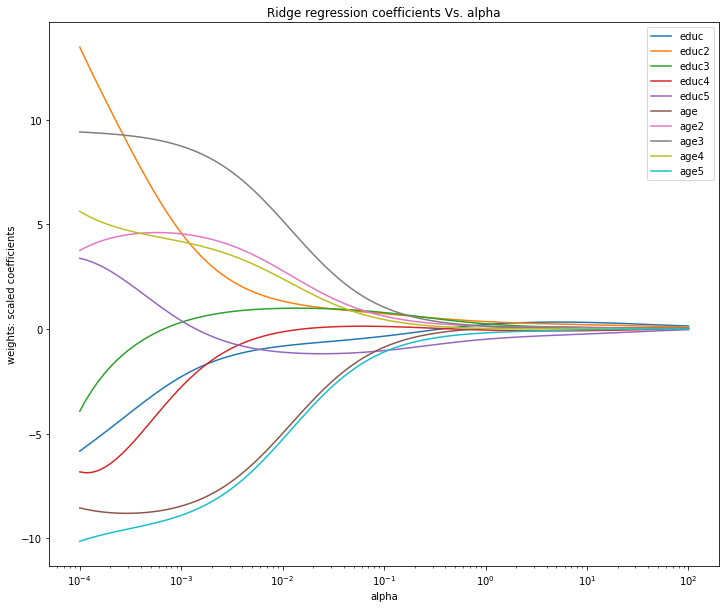

In [18]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alphas, coefs_ridge)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Ridge regression coefficients Vs. alpha')
plt.legend(df.drop('wage',axis=1, inplace=False).columns)

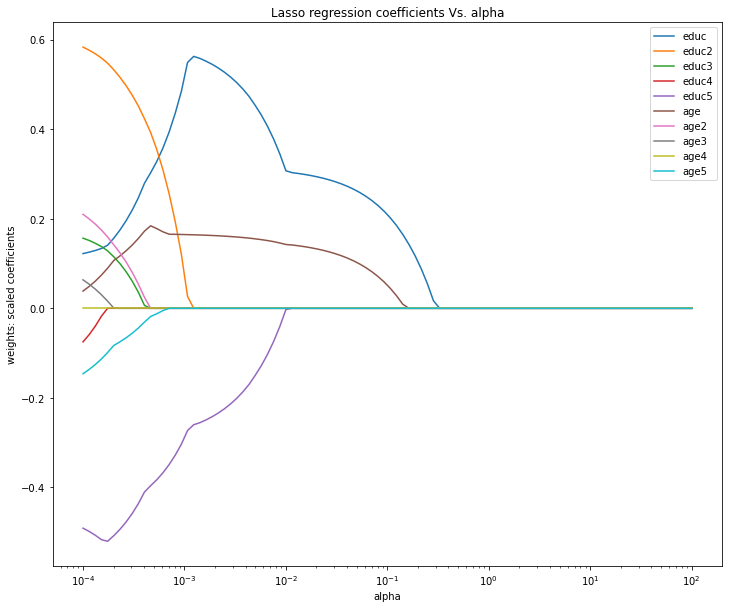

In [19]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alphas, coefs_lasso)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Lasso regression coefficients Vs. alpha')
plt.legend(df.drop('wage',axis=1, inplace=False).columns)

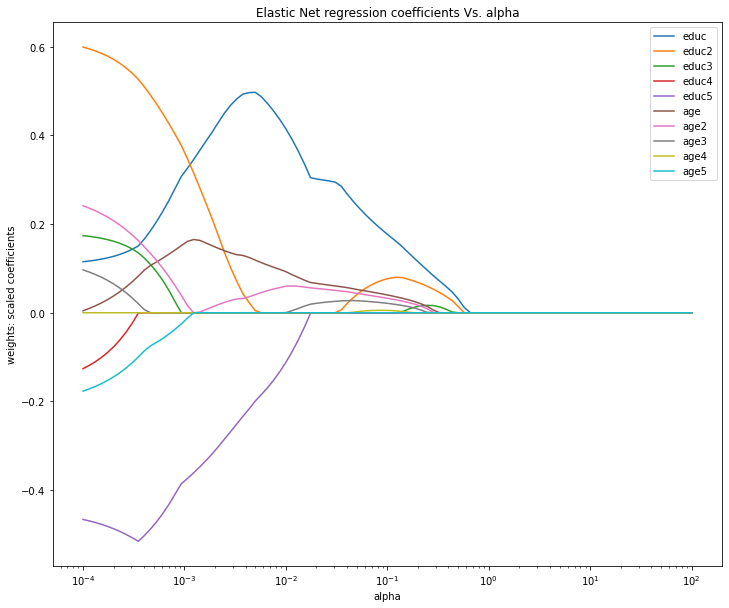

In [20]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alphas, coefs_net)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Elastic Net regression coefficients Vs. alpha')
plt.legend(df.drop('wage',axis=1, inplace=False).columns)

9. From the 3 plots you generated in part 8, answer the following questions:

    9.1 Ridge regression plot: Which coefficients drop most significantly when alpha increases from 0.0001 to 10. (name the top two) 

    9.2 Lasso regression plot: What are the top 2 variables that survive when alpha=0.1?

    9.3 From the Lasso plot and ElasticNet plot, why the magnitude of Lasso coefficients are larger than the ElasticNet coefficients for alpha=0.0001?